In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from config import getConfig

In [2]:
cfg = getConfig()

In [37]:
df = pd.read_csv(cfg['dataLoc']+'fundData.csv')

In [36]:
fundList = set(df.fund)

df.set_index('fund', inplace=True)

In [6]:
dfList=[]
for f in fundList:
    tmp = df.loc[f]
    tmp.reset_index(inplace=True)
    tmp = tmp[['date', 'price']]
    tmp.set_index('date', inplace=True)
    tmp.rename(columns={'price': f}, inplace=True)
    dfList.append(tmp)

df = pd.concat(dfList, axis=1)
df.sort_index(inplace=True, ascending=True)

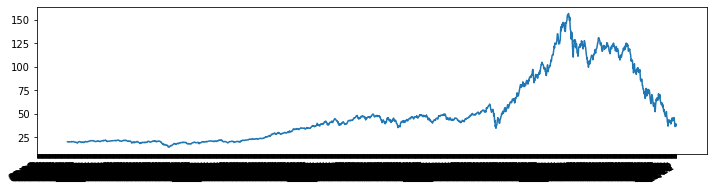

In [32]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(df["ARKK"].index, df['ARKK'])
myFmt = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()

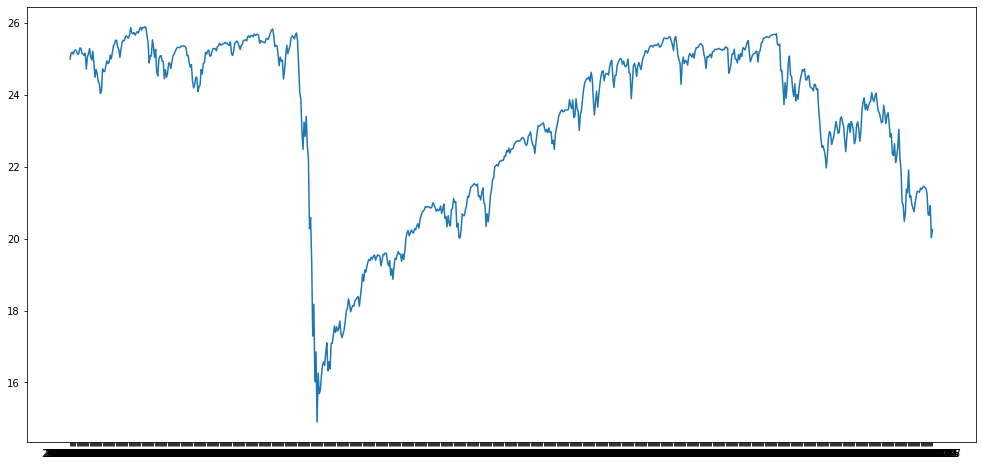

In [14]:
plt.figure(figsize=(17,8))
data = df['RYLD'].dropna()
plt.plot(data)
plt.show()
plt.close()

In [ ]:
funds = ['QYLD']

plt.rc('legend',fontsize=20)

plt.figure(figsize=(17,8))
for f in funds:
    tmp=df[f].dropna()
    plt.plot(tmp.index, tmp.values, label=f)
plt.legend()
plt.ylim(0.8)
plt.show()
#plt.savefig('tom.png')
plt.close()

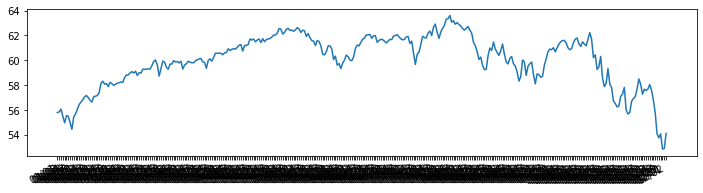

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))
tmp = df[df['fund']=='JEPI']
plt.plot(tmp['date'], tmp['price'], label=f)
myFmt = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

In [49]:
tmp=df[df['fund']=='JEPI']

In [50]:
tmp

,fund,date,price
8992,JEPI,2021-02-22,55.80
8993,JEPI,2021-02-23,55.85
8994,JEPI,2021-02-24,56.07
8995,JEPI,2021-02-25,55.49
8996,JEPI,2021-02-26,54.97
...,...,...,...
9323,JEPI,2022-06-14,53.76
9324,JEPI,2022-06-15,54.08
9325,JEPI,2022-06-16,52.86
9326,JEPI,2022-06-17,52.91


In [33]:
tmp.index

Index(['2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
       '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
       ...
       '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13',
       '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-21'],
      dtype='object', name='date', length=336)

In [23]:
# Calculate annualized return
numYears = len(df)/12

In [28]:
np.power(1.25, numYears)

1.4237733313744956

In [109]:
def getRate(initVal, finalVal, numDays):
    numYears = numDays/365
    return 1+npf.rate(nper=numYears, pmt=0, pv=-initVal, fv=finalVal)

In [110]:
def calcDays(start, end):
    delta = end-start
    return delta.to_pytimedelta().days

In [121]:
for f in fundList:
    initVal = df.iloc[0][f]
    finalVal = df.iloc[-1][f]
    start = pd.to_datetime(df.index[0])
    end = pd.to_datetime(df.index[-1])
    numDays = calcDays(start, end)
    annualRate = getRate(initVal, finalVal, numDays)
    print("{}: {:.5}".format(f, annualRate))

ARKK: nan
QYLD: 0.60224
COMB: 1.9856
JEPI: 0.80812
CCJ: 1.1688
NUSI: 0.58954
RYLD: 0.72135
SPY: 0.70911


143

In [37]:
df.corr()

,ARKK,QYLD,COMB,JEPI,CCJ,NUSI,RYLD,SPY
ARKK,1.000000,0.890049,-0.789911,0.793033,-0.151120,0.968134,0.788714,0.911284
QYLD,0.890049,1.000000,-0.553373,0.936090,0.183289,0.812460,0.929287,0.959044
COMB,-0.789911,-0.553373,1.000000,-0.407418,0.646526,-0.857530,-0.341623,-0.557353
JEPI,0.793033,0.936090,-0.407418,1.000000,0.330936,0.704489,0.897860,0.951910
CCJ,-0.151120,0.183289,0.646526,0.330936,1.000000,-0.303283,0.408389,0.157889
NUSI,0.968134,0.812460,-0.857530,0.704489,-0.303283,1.000000,0.688670,0.846498
RYLD,0.788714,0.929287,-0.341623,0.897860,0.408389,0.688670,1.000000,0.900480
SPY,0.911284,0.959044,-0.557353,0.951910,0.157889,0.846498,0.900480,1.000000


In [13]:
df['JEPI']

date
2012-06-22      NaN
2012-06-25      NaN
2012-06-26      NaN
2012-06-27      NaN
2012-06-28      NaN
              ...  
2022-06-14    53.76
2022-06-15    54.08
2022-06-16    52.86
2022-06-17    52.91
2022-06-21    54.12
Name: JEPI, Length: 2516, dtype: float64